## Medical Insurance Cost

#### Machine Learning Project TO-DO:
- The Problem of the Project
- Data Ingestion
- Understanding the data
- Data Exploratory Analysis
- Data Preprocessing
- Model Training
- Choosing the best Model

### 1. Project Problem Statement

- The project determines how the cost of health insurance is affected by other variables such as Age, Sex, BMI, Number of Children, Smoking Status and Residential region in the US.

### 2. Data Ingestion

- Data Source : https://www. kaggle.......
- The Data Consist of 7 columns and 1338 rows

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn, and Warning Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os # To save our data after cleaning, exploration for model training
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV data as pandas dataframe

In [3]:
df = pd.read_csv('../data/insurance.csv')

#### Show Top 5 Records

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Shape of Dataset

In [5]:
df.shape

(1338, 7)

### 2.2 Dataset Information
- Age: Age of Primary Beneficiary
- Sex: Gender of Beneficiary (male, female)
- BMI: Body Mass Index. A measure of Body Fat Based on Height and Weight
- Children: Number of Children covered by Health Insurance
- Smoker: Smoking status of the beneficiary (yes, no)
- Region: Residential region in the US (Northwest, Northeast, Southwest, Southeast)
- Charges: Medical Insurance Cost billed to Beneficiary

#### Potential Use-cases of this Dataset are:
- Build Predictive Models for Medical costs
- Explore how Smoking and BMI impact the Cost of Health Insurance(charges)
- Teach about regression and Feature engineering
- Analyze healthcare affordability trends

### Data Checks to Perform
- Check missing values
- Check Duplicates
- Check datatypes
- Check the numbers of Unique values of each column
- Check Statistics of Dataset
- Check various categories Present in the different categorical columns

### 3.1 Check Missing Values

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values in the dataset

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

np.int64(1)

#### We have one duplicate. so we need to drop it

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

### 3.3 Check Data types
- This show the number of null value in each column, and also show the columns' Data type

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


## Insight
- All rows and columns have no null value(missing variable)
- The dataset have 2 integer, 2 float and 3 object variables

### 3.4 Checking the number of Unique values for each column

In [10]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

##### The number of unique values shows that children is wrongly classified as integer, whereas it is an object variable. Let's convert that to object

In [11]:
df['children'] = df['children'].astype('str')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   object 
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 83.6+ KB


#### Now, we correctly have 1 integer, 2 floats and 4 object variables

### 3.5 Check Statistics of Basic Dataset

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


#### Insight:
- There is high variation between the mean of the numerical data
- The standard deviation is also largely gapped

### 3.6 Exploring Data

In [14]:
#Separating Categorical and Numerical features
cat_features = df.select_dtypes(include= 'object').columns
num_features = df.select_dtypes(exclude= 'object').columns

#### Checking Unique values in Categorical feature

In [15]:
for cat in cat_features:
    print(f'categories in {cat} variable: ', end="")
    print(df[cat].unique())

categories in sex variable: ['female' 'male']
categories in children variable: ['0' '1' '3' '2' '5' '4']
categories in smoker variable: ['yes' 'no']
categories in region variable: ['southwest' 'southeast' 'northwest' 'northeast']


#### Checking the numbers and values of dataset features

In [16]:
print(f'We have {len(num_features)} numerical features: {num_features.values}')
print(f'\nWe have {len(cat_features)} categorical features: {cat_features.values}')

We have 3 numerical features: ['age' 'bmi' 'charges']

We have 4 categorical features: ['sex' 'children' 'smoker' 'region']


In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 3.7 Visual Exploration of Our Ddataset

#### 3.7.1 Numerical Variables Analysis

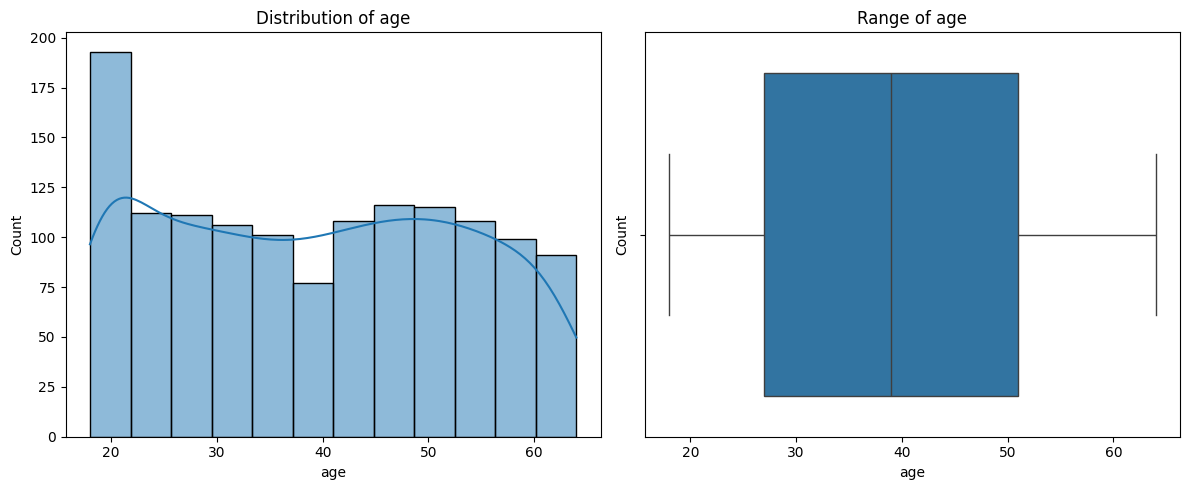

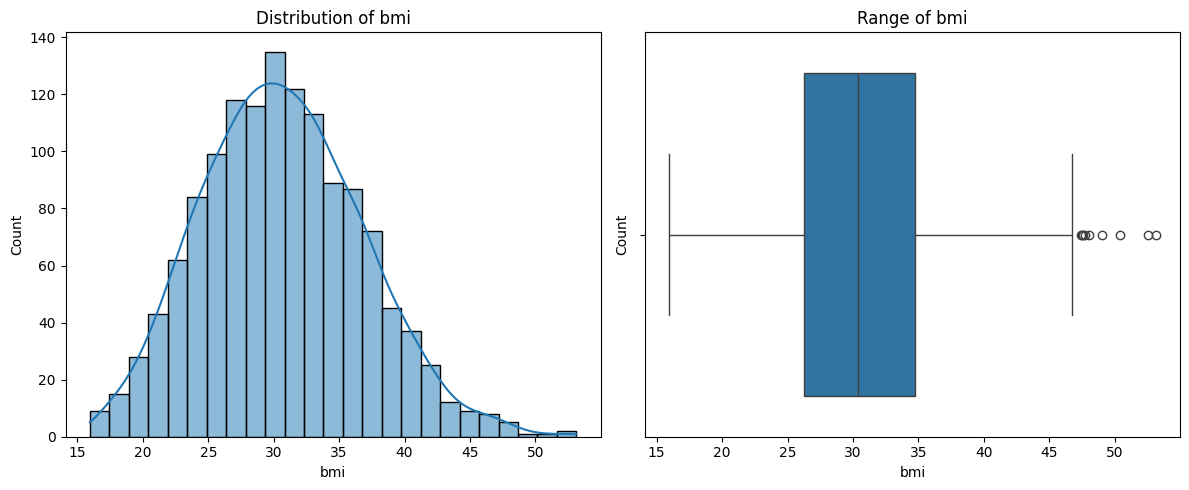

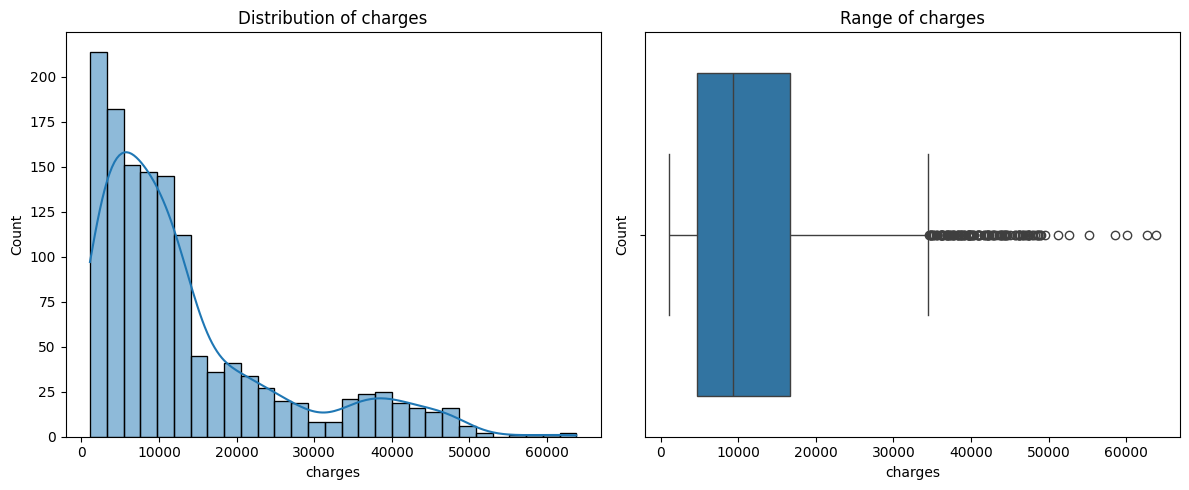

In [18]:
for num in num_features:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(data= df, x= num, kde=True)
    plt.title(f'Distribution of {num}' )
    plt.xlabel(num)
    plt.ylabel('Count')

    plt.subplot(1,2,2)
    sns.boxplot(data= df, x= num)
    plt.title(f'Range of {num}' )
    plt.xlabel(num)
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

#### Insight:

##### Age

- There is a dominant young demographic between the ages of 18 to 22 who subscribe to health insurance compare to other age. 
- The minimum and the maximum age of subscribers is between age 18 to 64. This is an indication that health insurance subscribers are likely constrained to a standard Working-Age population or adult demographic (18-65)

##### BMI

- Unlike Age, BMI follow is relatively normal distribution, where the central peaks at BMI of approximately 30. This is the mode(the most common BMI in the dataset)
- While it is largely symmetrical, there is a small number of individuals with significantly higher BMI due to the tail on the right (few outliers).
- Overweight Tendency : A healthy BMI is generally considered to be between 18.5 and 24.9, health insurance subscribers lean heavily towards the "Overweight" and "Obese" Categories. The Median person here (BMI~30) is on the border of obesity. 

##### Charges

- High Frequency of Low Charges :The vast majority of health insurance subscribers incur low charges (roughly between 0$ and $15000)
- rightly skewed : While fewer people pay high amounts, there are outliers of above $60000 paid for health insurance charges
- Bimodal Behaviour : There is a secondary bump around $35000 to $45000 mark, here the curve rise again slighly. This suggest a sub-group within the health service subscribers that has consistently higher cost of charges. This, most time correlate with specific risk factor such as smoking or chronic illness


#### 3.7.2 Categorical Variable Analysis

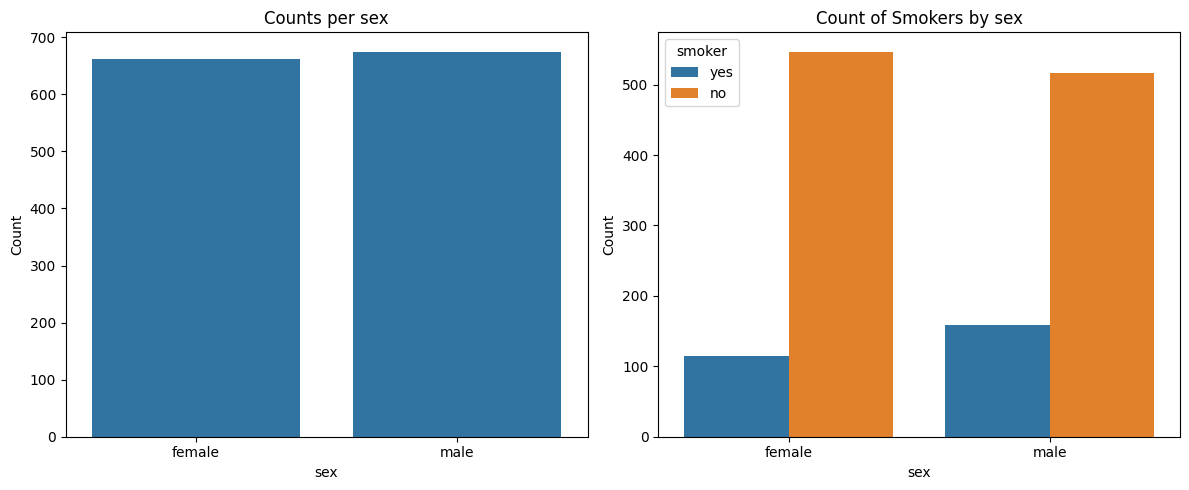

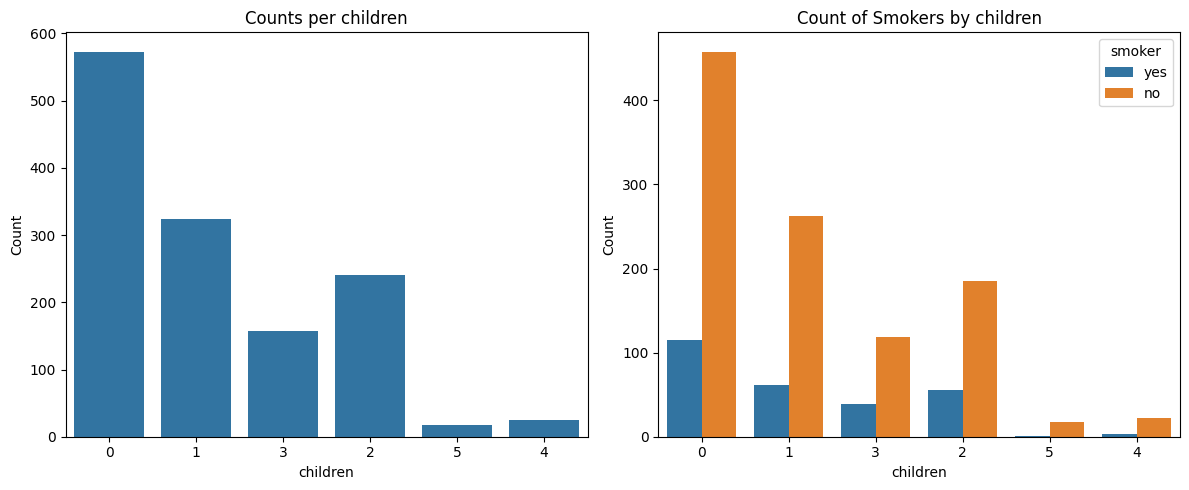

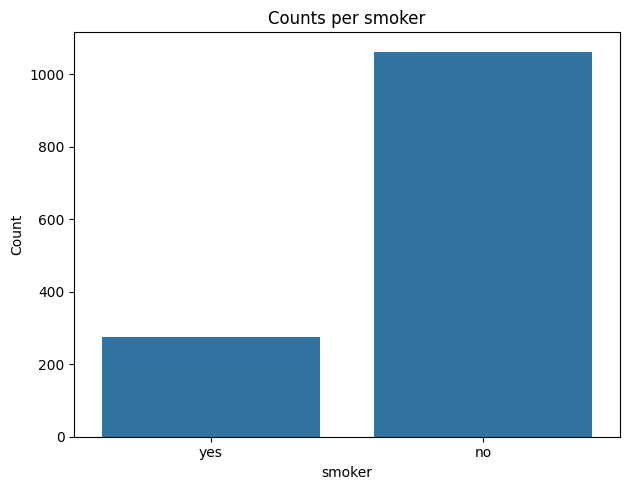

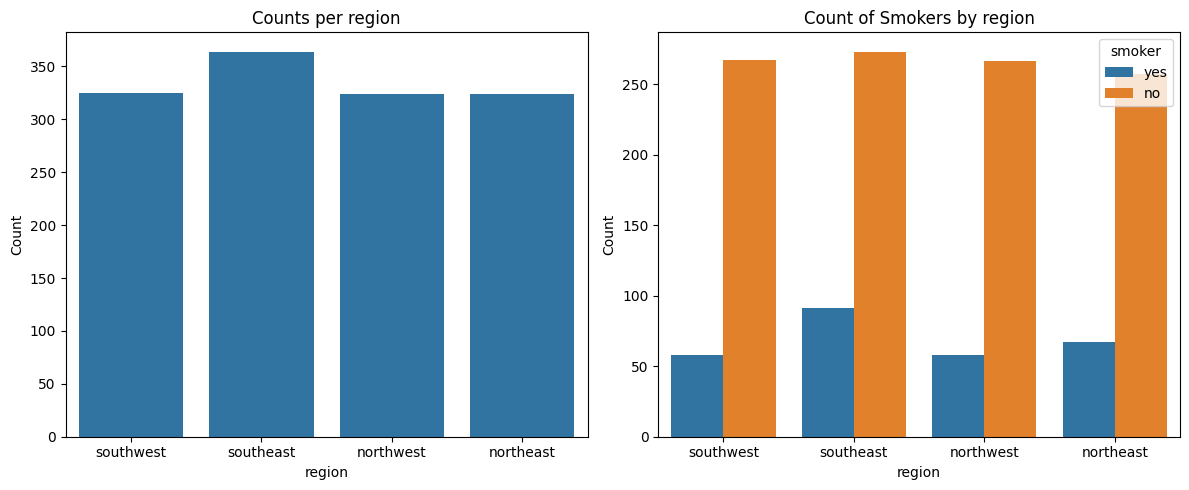

In [19]:
for cat in cat_features:
    plt.figure(figsize= (12,5))

    plt.subplot(1,2,1)
    sns.countplot(data = df, x=cat)
    plt.title(f'Counts per {cat}')
    plt.ylabel("Count")

    if cat != "smoker":
        plt.subplot(1,2,2)
        sns.countplot(data = df, x=cat, hue= 'smoker')
        plt.title(f'Count of Smokers by {cat}')
        plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

#### Insight
##### Sex
- There is almost equal numbers of male and female subscribers of Health Insurance
- Non-Smokers has the highest number of subscription from both sex

##### Children
- Health Insurance Subscribers without Children are Significantly higher than those with Children
- There is high rate of non-smokers among subscribers without children

##### Smoker
- The overall non-smokers who subscribe for Health Insurance are significantly higher than smokers

##### Region 
- The South - Eastern region has the highest number of health insurance subscribers
- There is no significant difference in numbers of smokers from each of the region

### 4. Bivariate and Multivariate Analysis

##### 4.1 Average Charges by Smoking status

In [20]:
avg_charges_per_smokers = df.groupby('smoker')['charges'].median().reset_index()
avg_charges_per_smokers

,smoker,charges
0,no,7345.72660
1,yes,34456.34845


#### Visualised

<Figure size 1000x500 with 0 Axes>

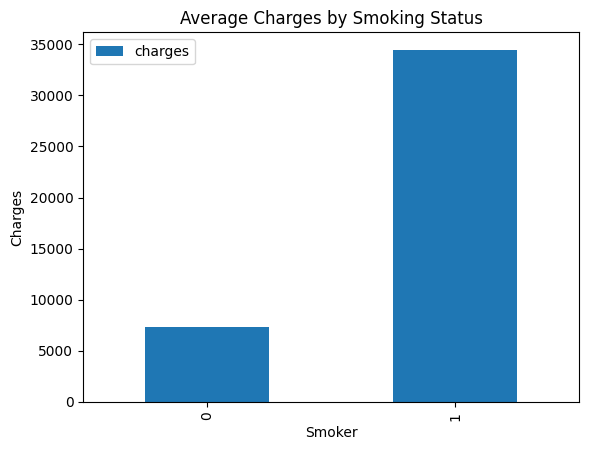

In [21]:
plt.figure(figsize=(10,5))
avg_charges_per_smokers.plot(kind='bar')
plt.title('Average Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel("Charges")
plt.show()

#### Insight:
- Smokers pay for Health Insurance more than non-smokers

#### 4.2 Average Charges by Smokers and Region (Multivariate analysis)

In [22]:
Smoker_Region_Avg_Charges = df.groupby(['smoker', 'region'])['charges'].median().reset_index()
Smoker_Region_Avg_Charges

,smoker,region,charges
0,no,northeast,8342.908750
1,no,northwest,7259.232050
2,no,southeast,6652.528800
3,no,southwest,7348.142000
4,yes,northeast,28101.333050
5,yes,northwest,27488.996475
6,yes,southeast,37484.449300
7,yes,southwest,35165.256500


##### Let's Visualise Using Seaborn

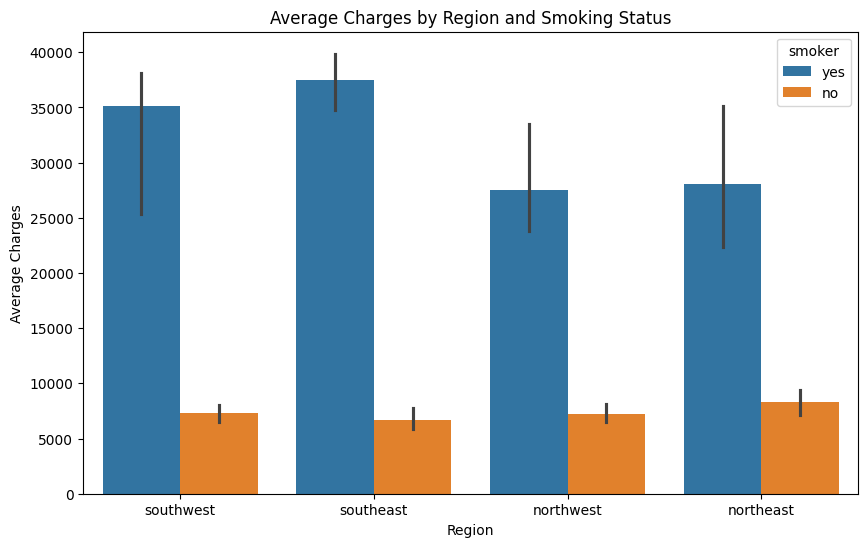

In [23]:
plt.figure(figsize= (10,6))
sns.barplot(data= df, x= 'region', y= 'charges', hue= 'smoker', estimator= 'median')
plt.title('Average Charges by Region and Smoking Status')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.show()

#### Insight:
- Smokers in each region pay significantly higher than the non-smokers of each region
- Smokers in SouthEast pay the highest compare to other region

#### 4.3 Average Charges by Age and Region (Multivariate analysis)

##### Age Variable is an integer. Let's change it to categorical in  a binned version 
##### then we can perform our exploratory

In [24]:
df["age_cat"] = pd.cut(df.age,[15,20,25,30,35,40,45,50,55,60,65])
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,"(15, 20]"
1,18,male,33.770,1,no,southeast,1725.55230,"(15, 20]"
2,28,male,33.000,3,no,southeast,4449.46200,"(25, 30]"
3,33,male,22.705,0,no,northwest,21984.47061,"(30, 35]"
4,32,male,28.880,0,no,northwest,3866.85520,"(30, 35]"


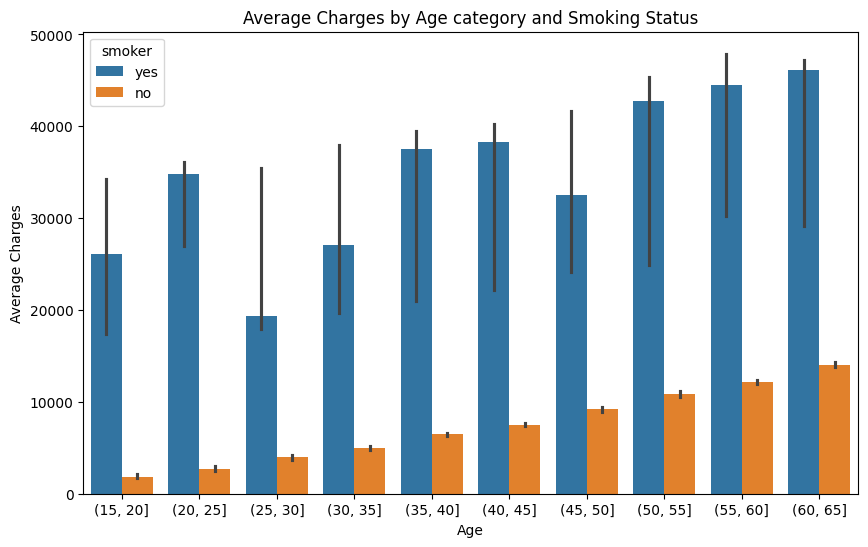

In [25]:
plt.figure(figsize= (10,6))
sns.barplot(data= df, x= 'age_cat', y= 'charges', hue= 'smoker', estimator= 'median')
plt.title('Average Charges by Age category and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Average Charges')
plt.show()

#### Insight:
- Charges Increases by Age. The older people get, the more they pay for Health Insurance
- Smokers here also pay significantly higher than non-smokers

#### 4.4 Average Charges by Sex and Age (Multivariate analysis)

In [26]:
charges_per_sex_age = df.groupby(['sex', 'age_cat'])['charges'].median().reset_index()
charges_per_sex_age

,sex,age_cat,charges
0,female,"(15, 20]",2238.460175
1,female,"(20, 25]",3208.787000
2,female,"(25, 30]",4340.440900
3,female,"(30, 35]",5286.723625
4,female,"(35, 40]",7133.902500
5,female,"(40, 45]",7985.789075
6,female,"(45, 50]",9747.094100
7,female,"(50, 55]",11436.738150
8,female,"(55, 60]",12629.896700
9,female,"(60, 65]",14474.675000


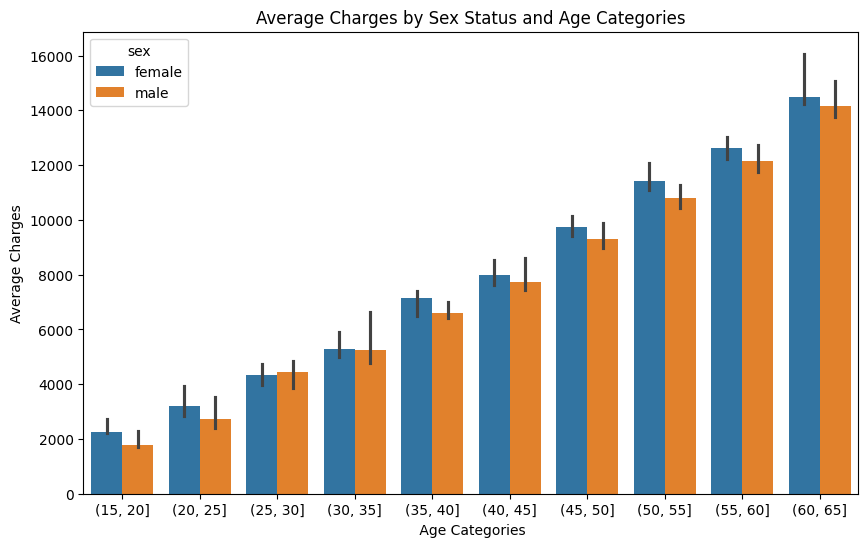

In [27]:
plt.figure(figsize= (10,6))
sns.barplot(data= df, x= 'age_cat', y= 'charges', hue= 'sex', estimator= 'median')
plt.title('Average Charges by Sex Status and Age Categories')
plt.xlabel(' Age Categories')
plt.ylabel('Average Charges')
plt.show()

#### Insight:
- Base on Age Categories, Females generally pays higher than males in most cases, but not significantly high
- Age still remain a significant factor irrespective of sex - The higher the Age, the Higher the Health insurance cost

### 5. Correlation of Numerical Features

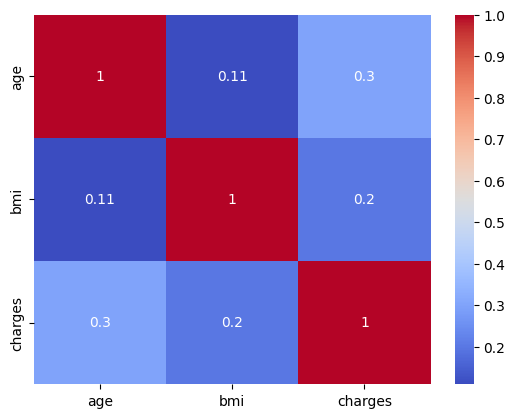

In [28]:
sns.heatmap(data = df[num_features].corr(), annot= True, cmap= "coolwarm")
plt.show()

#### Correlation Of All Features

#### After Our Exploratory Analysis, Let's save our dataset for model training

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,age_cat
0,19,female,27.900,0,yes,southwest,16884.92400,"(15, 20]"
1,18,male,33.770,1,no,southeast,1725.55230,"(15, 20]"
2,28,male,33.000,3,no,southeast,4449.46200,"(25, 30]"
3,33,male,22.705,0,no,northwest,21984.47061,"(30, 35]"
4,32,male,28.880,0,no,northwest,3866.85520,"(30, 35]"


##### The age_cat features is not what we need for training our model. it is a feature engineering that helps our exploratory analysis. So let's drop it

In [30]:
df = df.drop(columns= ["age_cat"], axis= 1)

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### We can now save our data for model training

In [32]:
df.to_csv('../data/insurance_2.csv', index= False)

In [33]:
os.listdir("../data")

['.ipynb_checkpoints', 'insurance.csv', 'insurance_2.csv']